### Import useful libraries and helpers

In [8]:
%run "Imports.ipynb"
%run "Helpers.ipynb"

### Load the data

In [2]:
df_all = pd.read_pickle("df_all.pkl")

In [3]:
df_all.head()

,Unnamed: 0,zone,timestamp,supply,forecast,date,time,new_year,new_year_week,epiphany,...,other,temperature_max,temperature_min,rain,sat_or_sun,holidays,holidays_week,x_coordinate,y_coordinate,weekday
0,0,0_0_10_10,2019-01-04 14:00:00,1,NaN,2019-01-04,14:00:00,0,0.5,0,...,0,0.0,-6.666667,0.508,0,0,0.5,0,0,Friday
1,1,0_0_10_10,2019-01-04 15:00:00,0,NaN,2019-01-04,15:00:00,0,0.5,0,...,0,0.0,-6.666667,0.508,0,0,0.5,0,0,Friday
2,2,0_0_10_10,2019-01-04 16:00:00,0,NaN,2019-01-04,16:00:00,0,0.5,0,...,0,0.0,-6.666667,0.508,0,0,0.5,0,0,Friday
3,3,0_0_10_10,2019-01-04 17:00:00,0,NaN,2019-01-04,17:00:00,0,0.5,0,...,0,0.0,-6.666667,0.508,0,0,0.5,0,0,Friday
4,4,0_0_10_10,2019-01-04 18:00:00,0,NaN,2019-01-04,18:00:00,0,0.5,0,...,0,0.0,-6.666667,0.508,0,0,0.5,0,0,Friday


In [4]:
zone_names = df_all['zone'].unique()

In [5]:
DataFrameDict = {elem : pd.DataFrame for elem in zone_names}

for key in DataFrameDict.keys():
    DataFrameDict[key] = df_all[:][df_all.zone == key]

In [6]:
# plotData = pd.DataFrame({"zone": zone_names})
# plotData['mean_supply'] = plotData.apply (lambda row: DataFrameDict[row['zone']]['supply'].mean(), axis=1)
# plotData['prophet_prediction'] = plotData.apply (lambda row: single_zone_prophet_forecast_improved(DataFrameDict[row['zone']], '2020-01-31 00:00:00'), axis=1)

In [7]:
# plotData.to_pickle("plotData.pkl")

In [9]:
plotData = pd.read_pickle("plotData.pkl")

In [10]:
plotData['naive_prediction'] = plotData.apply (lambda row: single_zone_naive_forecast(DataFrameDict[row['zone']], '2020-01-31 00:00:00'), axis=1)

In [22]:
plotData['improvement'] = plotData.apply (lambda row: row['naive_prediction'] > row['prophet_prediction'], axis=1)

In [31]:
plotData['improvement_num'] = plotData.apply (lambda row: row['naive_prediction'] - row['prophet_prediction'], axis=1)

In [32]:
plotData.head()

,zone,mean_supply,prophet_prediction,naive_prediction,improvement,improvement_num
0,0_0_10_10,0.025693,1.590255,2.000000,True,0.409745
1,0_1_10_10,0.049296,1.342014,1.333333,False,-0.008681
2,0_3_10_10,0.015775,1.522033,2.200000,True,0.677967
3,0_4_10_10,0.466854,1.133121,1.233333,True,0.100213
4,0_5_10_10,0.110717,2.145202,2.272727,True,0.127525


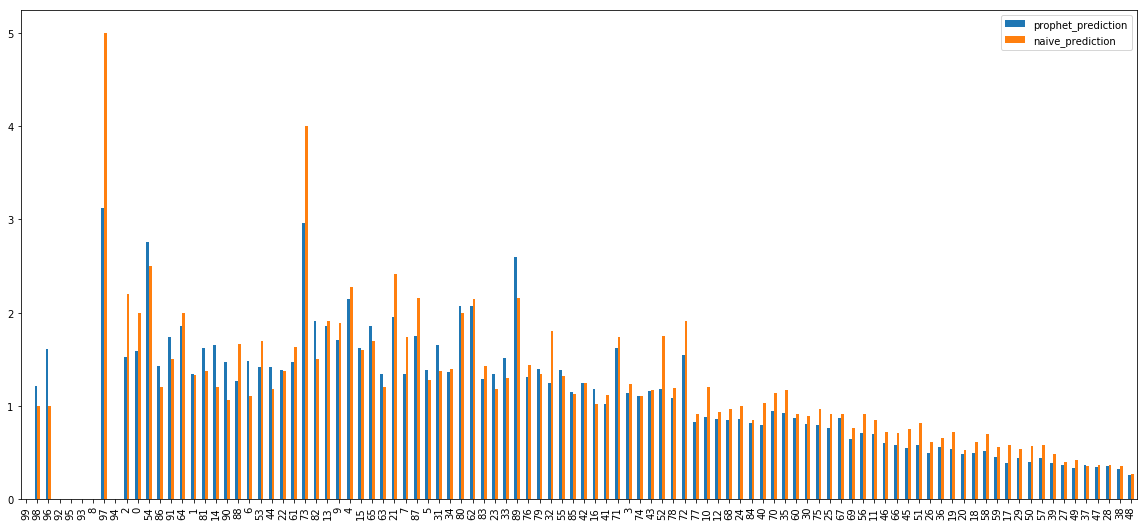

In [17]:
# plt.figure(figsize=(12, 9))
plotData.sort_values('mean_supply', ascending=True)[['prophet_prediction','naive_prediction']].plot.bar(figsize=(20, 9),stacked=False)

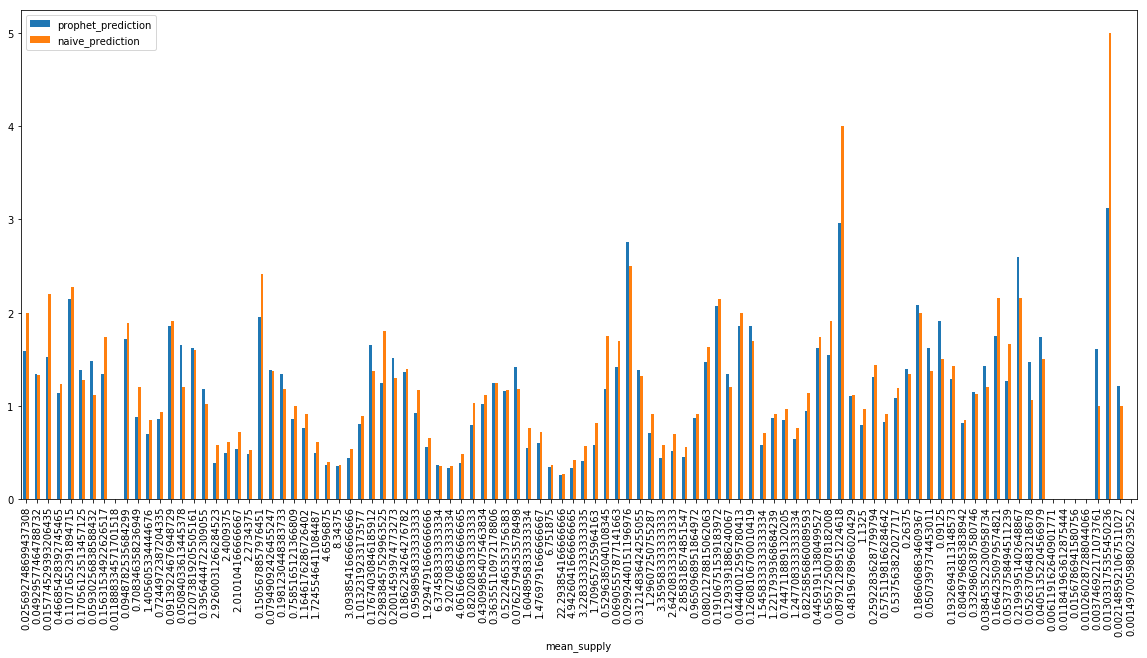

In [24]:
plotData.plot(x="mean_supply", y=['prophet_prediction','naive_prediction'], kind="bar", figsize=(20, 9))

In [34]:
sorted = plotData.reset_index().sort_values('mean_supply')

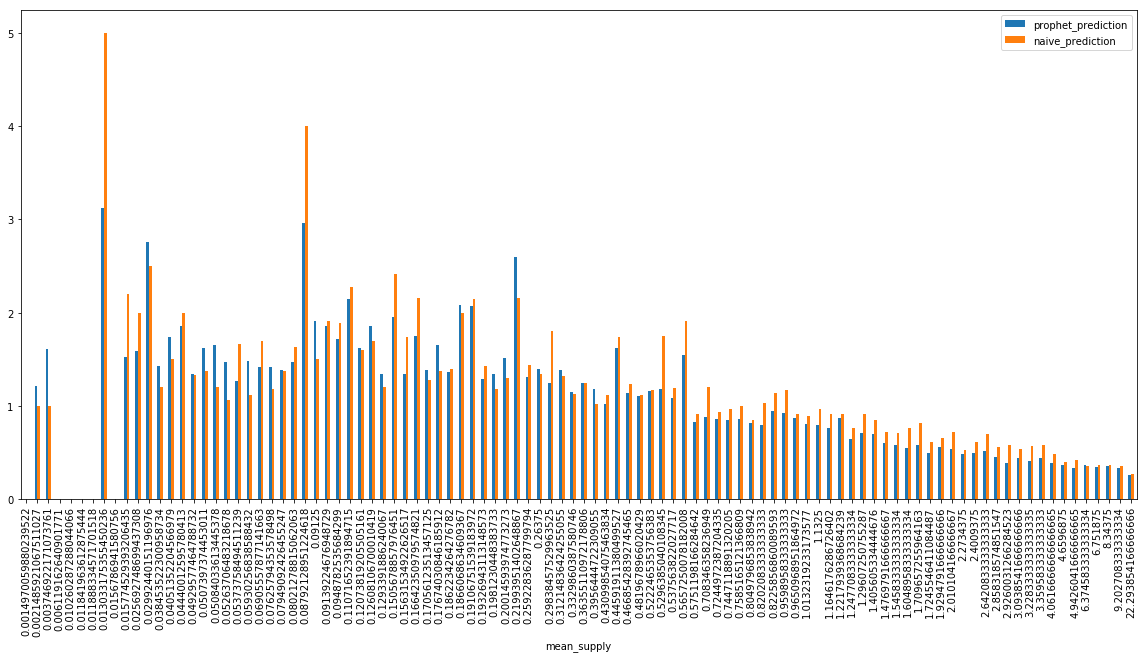

In [27]:
sorted.plot(x="mean_supply", y=['prophet_prediction','naive_prediction'], kind="bar", figsize=(20, 9))

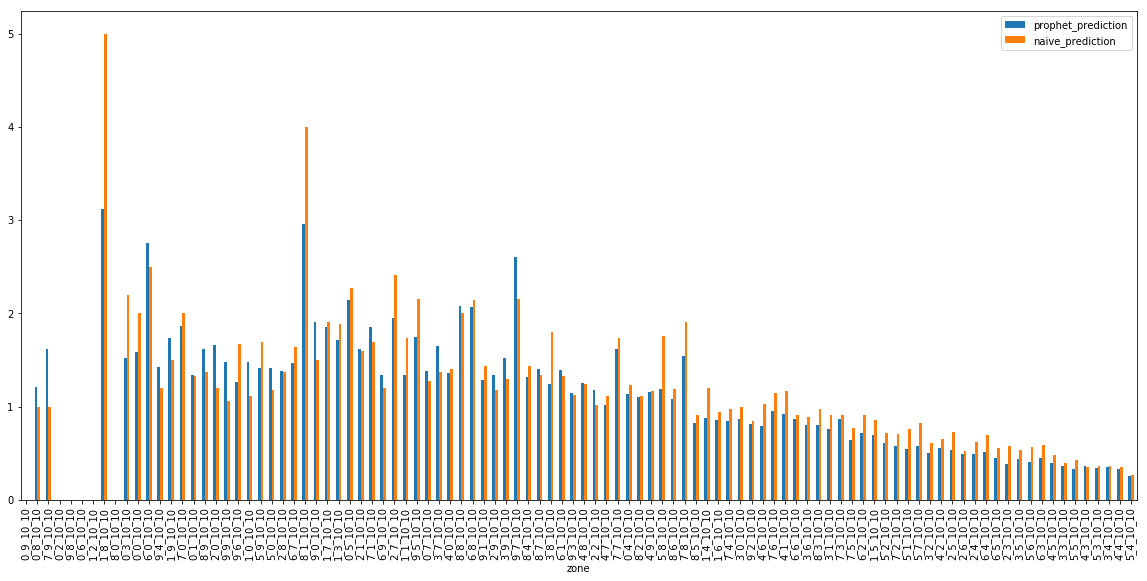

In [28]:
sorted.plot(x="zone", y=['prophet_prediction','naive_prediction'], kind="bar", figsize=(20, 9))

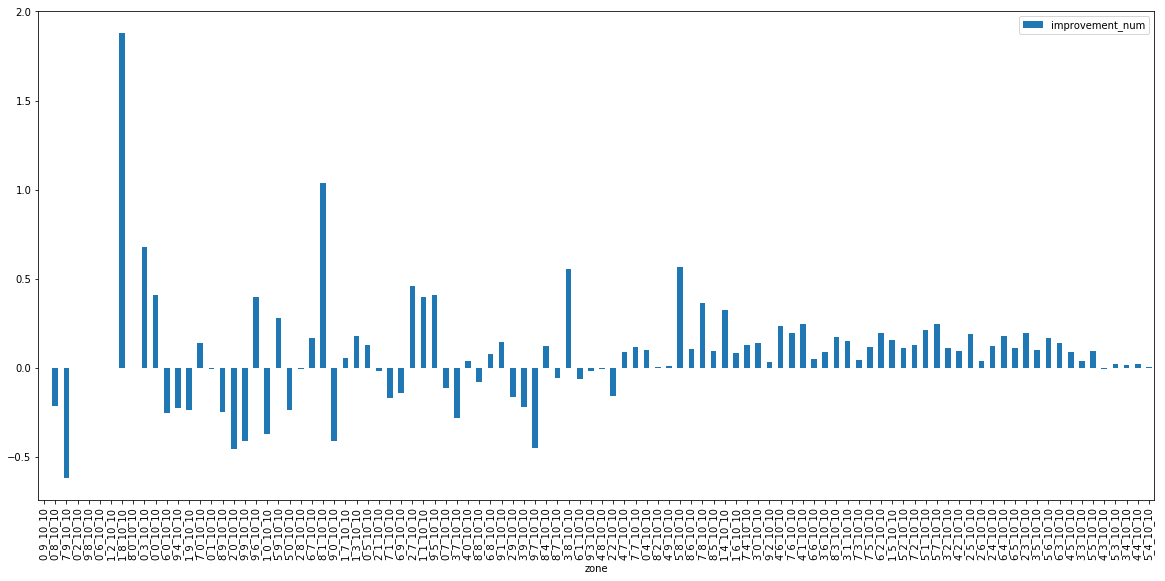

In [36]:
sorted.plot(x="zone", y=['improvement_num'], kind="bar", figsize=(20, 9))

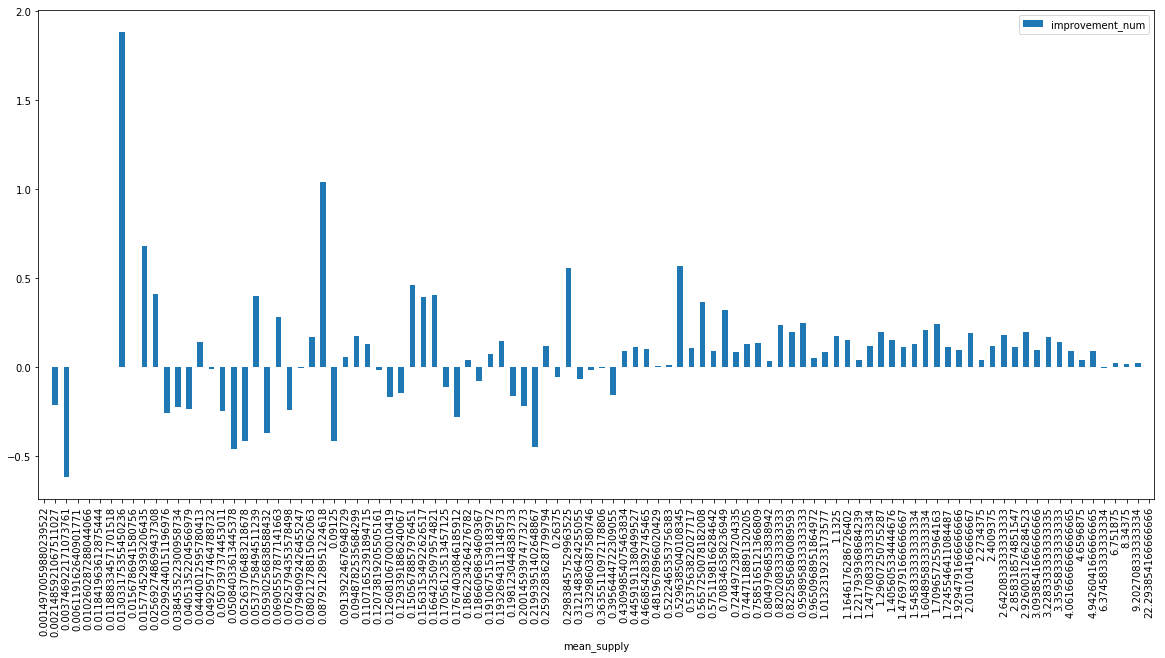

In [37]:
sorted.plot(x="mean_supply", y=['improvement_num'], kind="bar", figsize=(20, 9))